In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

In [232]:
df=pd.read_csv('Ridership with Features.csv')
df=df.iloc[:,1:]
df.head()

,BCT_Code,Borough,Ridership,MonthS,DOWS,Total population,Unemployment_Rate,Per_Capita_Income,18-64_Poverty
0,1000201,Manhattan,228,1,0,2012.0,5.1,13405.0,29.1
1,1000201,Manhattan,195,1,1,2012.0,5.1,13405.0,29.1
2,1000201,Manhattan,230,1,2,2012.0,5.1,13405.0,29.1
3,1000201,Manhattan,229,1,3,2012.0,5.1,13405.0,29.1
4,1000201,Manhattan,191,1,4,2012.0,5.1,13405.0,29.1


In [233]:
df.shape

(56812, 9)

In [234]:
df1=pd.pivot_table(df, values='Ridership',index=['BCT_Code'],columns=['MonthS','DOWS'],aggfunc=np.sum)
df1.head()

MonthS       1                                                2          \
DOWS          0      1      2      3      4      5      6      0      1   
BCT_Code                                                                  
1000201   228.0  195.0  230.0  229.0  191.0  148.0  172.0  187.0  207.0   
1000202   692.0  576.0  654.0  654.0  648.0  414.0  544.0  711.0  631.0   
1000600   798.0  694.0  770.0  808.0  630.0  514.0  658.0  808.0  751.0   
1000700   807.0  855.0  869.0  910.0  648.0  460.0  581.0  905.0  847.0   
1000800   589.0  535.0  552.0  595.0  455.0  418.0  432.0  534.0  520.0   

MonthS            ...      11                      12                          \
DOWS           2  ...       4       5       6       0       1       2       3   
BCT_Code          ...                                                           
1000201    238.0  ...   272.0   329.0   250.0   236.0   241.0   272.0   293.0   
1000202    850.0  ...  1010.0  1033.0   771.0   785.0   819.0   925.0  1159.0   
1000600   1084.0  ...  1429.0  1848.0  1219.0  1031.0   948.0  1234.0  1547.0   
1000700   1245.0  ...  1447.0  1746.0  1225.0  1082.0  1042.0  1254.0  1439.0   
1000800    632.0  ...   623.0   840.0   583.0   589.0   573.0   666.0   791.0   

MonthS                           
DOWS           4       5      6  
BCT_Code                         
1000201    322.0   269.0  171.0  
1000202   1128.0   767.0  554.0  
1000600   1478.0  1186.0  821.0  
1000700   1202.0   853.0  570.0  
1000800    706.0   713.0  559.0  

[5 rows x 84 columns]

In [235]:
df1.shape

(724, 84)

In [236]:
df1.dropna(inplace=True)

In [237]:
month=df1.groupby(level=0, axis=1).mean()
dow=df1.groupby(level=1, axis=1).mean()

In [413]:
total.index

MultiIndex([( 1, 0),
            ( 1, 1),
            ( 1, 2),
            ( 1, 3),
            ( 1, 4),
            ( 1, 5),
            ( 1, 6),
            ( 2, 0),
            ( 2, 1),
            ( 2, 2),
            ( 2, 3),
            ( 2, 4),
            ( 2, 5),
            ( 2, 6),
            ( 3, 0),
            ( 3, 1),
            ( 3, 2),
            ( 3, 3),
            ( 3, 4),
            ( 3, 5),
            ( 3, 6),
            ( 4, 0),
            ( 4, 1),
            ( 4, 2),
            ( 4, 3),
            ( 4, 4),
            ( 4, 5),
            ( 4, 6),
            ( 5, 0),
            ( 5, 1),
            ( 5, 2),
            ( 5, 3),
            ( 5, 4),
            ( 5, 5),
            ( 5, 6),
            ( 6, 0),
            ( 6, 1),
            ( 6, 2),
            ( 6, 3),
            ( 6, 4),
            ( 6, 5),
            ( 6, 6),
            ( 7, 0),
            ( 7, 1),
            ( 7, 2),
            ( 7, 3),
            ( 7, 4),
            (

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


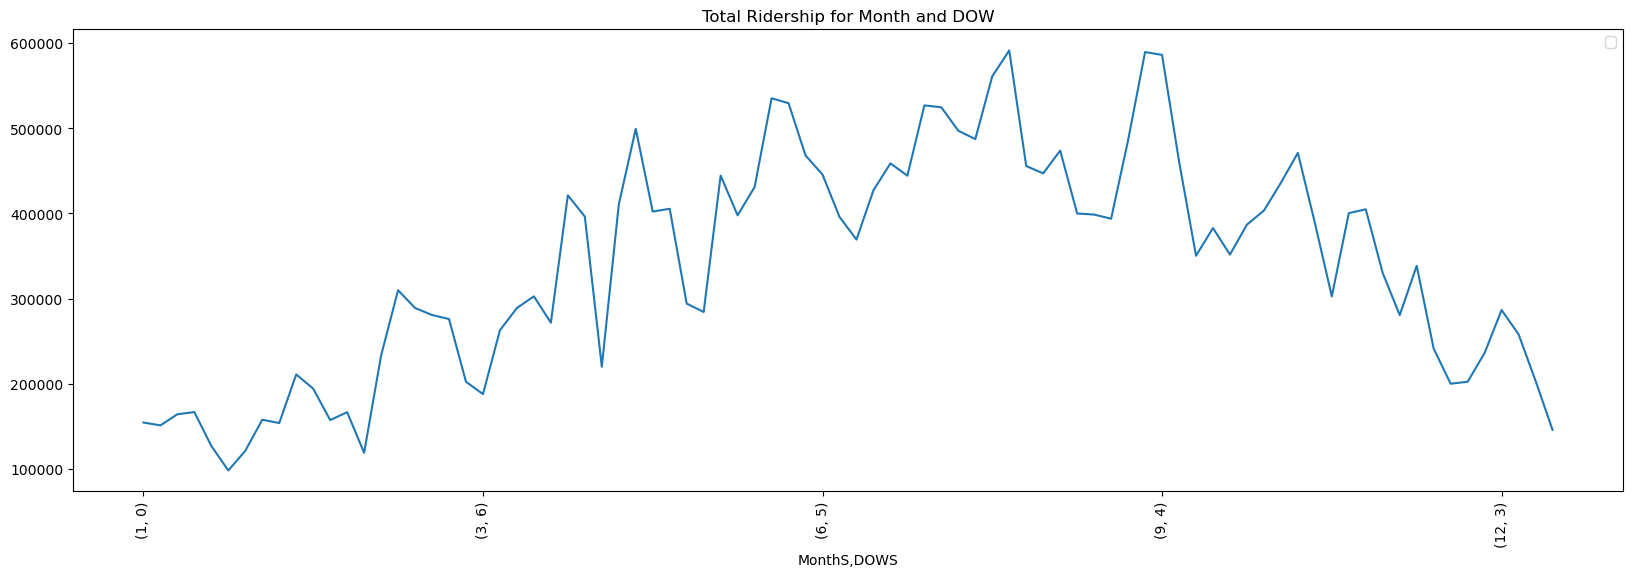

In [415]:
plt.figure(figsize=(20,6))
df1.sum(axis=0).plot()
plt.xticks(rotation=90)
plt.title('Total Ridership for Month and DOW')
plt.legend()

## Cluster

In [238]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters)
    cluster_labels = km.fit_predict(df1)    
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

/Users/Valencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Valencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.743467970767067
For n_clusters = 3, the average silhouette_score is : 0.6692615863698104


/Users/Valencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Valencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.6325743774345981
For n_clusters = 5, the average silhouette_score is : 0.5769225525784805


/Users/Valencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Valencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.5167279159753938
For n_clusters = 7, the average silhouette_score is : 0.49298391441104034


/Users/Valencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Valencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : 0.5021787315106643
For n_clusters = 9, the average silhouette_score is : 0.43321884353536005


In [334]:
km = KMeans(n_clusters=2)
km.fit(df1)
res=km.predict(df1)
df2=df1.reset_index()
cluster=pd.concat((df2,pd.Series(res)),axis=1)
cluster.rename(columns={0:'Cluster'},inplace=True)

/Users/Valencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [335]:
cluster.columns

Index([('BCT_Code', ''),           (1, 0),           (1, 1),           (1, 2),
                 (1, 3),           (1, 4),           (1, 5),           (1, 6),
                 (2, 0),           (2, 1),           (2, 2),           (2, 3),
                 (2, 4),           (2, 5),           (2, 6),           (3, 0),
                 (3, 1),           (3, 2),           (3, 3),           (3, 4),
                 (3, 5),           (3, 6),           (4, 0),           (4, 1),
                 (4, 2),           (4, 3),           (4, 4),           (4, 5),
                 (4, 6),           (5, 0),           (5, 1),           (5, 2),
                 (5, 3),           (5, 4),           (5, 5),           (5, 6),
                 (6, 0),           (6, 1),           (6, 2),           (6, 3),
                 (6, 4),           (6, 5),           (6, 6),           (7, 0),
                 (7, 1),           (7, 2),           (7, 3),           (7, 4),
                 (7, 5),           (7, 6),          

In [336]:
cluster.shape

(625, 86)

## Geo data for CT

In [337]:
import geopandas as gpd
city=pd.read_csv('CTGeo.csv')
city.head(2)

,the_geom,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-74.04387761639944 40.69018767...,1.00,1,Manhattan,100,1000100,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048501,1.844421e+06
1,MULTIPOLYGON (((-73.98449647076764 40.70950966...,2.01,1,Manhattan,201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05


### Merge geo data with df

In [338]:
#total data
df2=df1.reset_index()
geototal=pd.merge(city,df2,left_on='BoroCT2020', right_on='BCT_Code',how='right')

clustertotal=pd.concat((geototal,pd.Series(res)),axis=1)
clustertotal.rename(columns={0:'Cluster'},inplace=True)
clustertotal.shape

clustertotal['the_geom'] = gpd.GeoSeries.from_wkt(clustertotal['the_geom'])
clustertotal = gpd.GeoDataFrame(clustertotal, geometry='the_geom')
clustertotal=clustertotal.set_crs('epsg: 4326')


/var/folders/87/xq0l9ml563jg73g4rvyqn4xw0000gn/T/ipykernel_4308/1052070943.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  geototal=pd.merge(city,df2,left_on='BoroCT2020', right_on='BCT_Code',how='right')


In [339]:
clustertotal['Annual'] = np.sum(clustertotal.iloc[:,15:-1],axis=1)
clustertotal.head()

,the_geom,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,...,"(11, 6)","(12, 0)","(12, 1)","(12, 2)","(12, 3)","(12, 4)","(12, 5)","(12, 6)",Cluster,Annual
0,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",2.01,1,Manhattan,201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,...,250.0,236.0,241.0,272.0,293.0,322.0,269.0,171.0,0,28914.0
1,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",2.02,1,Manhattan,202,1000202,NaN,Lower East Side,MN0302,MN03,...,771.0,785.0,819.0,925.0,1159.0,1128.0,767.0,554.0,0,93922.0
2,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...",6.00,1,Manhattan,600,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,...,1219.0,1031.0,948.0,1234.0,1547.0,1478.0,1186.0,821.0,1,145194.0
3,"MULTIPOLYGON (((-73.99800 40.69880, -73.99802 ...",7.00,1,Manhattan,700,1000700,NaN,Financial District-Battery Park City,MN0101,MN01,...,1225.0,1082.0,1042.0,1254.0,1439.0,1202.0,853.0,570.0,1,188388.0
4,"MULTIPOLYGON (((-73.99191 40.70953, -73.99204 ...",8.00,1,Manhattan,800,1000800,NaN,Chinatown-Two Bridges,MN0301,MN03,...,583.0,589.0,573.0,666.0,791.0,706.0,713.0,559.0,0,79750.0


In [340]:
#Month data
month=month.reset_index()
geomonth=pd.merge(city,month,left_on='BoroCT2020', right_on='BCT_Code',how='right')

clustermonth=pd.concat((geomonth,pd.Series(res)),axis=1)
clustermonth.rename(columns={0:'Cluster'},inplace=True)
clustermonth.shape

clustermonth['the_geom'] = gpd.GeoSeries.from_wkt(clustermonth['the_geom'])
clustermonth = gpd.GeoDataFrame(clustermonth, geometry='the_geom')
clustermonth=clustermonth.set_crs('epsg: 4326')

In [341]:
#DOW data
dow=dow.reset_index()
geodow=pd.merge(city,dow,left_on='BoroCT2020', right_on='BCT_Code',how='right')
geodow.rename(columns={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)

clusterdow=pd.concat((geodow,pd.Series(res)),axis=1)
clusterdow.rename(columns={0:'Cluster'},inplace=True)
clusterdow.shape

clusterdow['the_geom'] = gpd.GeoSeries.from_wkt(clusterdow['the_geom'])
clusterdow = gpd.GeoDataFrame(clusterdow, geometry='the_geom')
clusterdow=clusterdow.set_crs('epsg: 4326')

### Plot annual ridership

In [342]:
city['the_geom'] = gpd.GeoSeries.from_wkt(city['the_geom'])
city = gpd.GeoDataFrame(city, geometry='the_geom')
city=city.set_crs('epsg: 4326')

In [343]:
clustertotal.columns

Index([  'the_geom',    'CTLabel',   'BoroCode',   'BoroName',     'CT2020',
       'BoroCT2020', 'CDEligibil',    'NTAName',    'NTA2020',   'CDTA2020',
       ...
            (11, 6),      (12, 0),      (12, 1),      (12, 2),      (12, 3),
            (12, 4),      (12, 5),      (12, 6),    'Cluster',     'Annual'],
      dtype='object', length=101)

In [344]:
plot=clustertotal[['the_geom',    'CTLabel',   'BoroCode',   'BoroName',     'CT2020',
       'BoroCT2020', 'CDEligibil',    'NTAName',    'NTA2020',   'CDTA2020',
         'CDTANAME',      'GEOID', 'Shape_Leng', 'Shape_Area',  'Cluster','Annual']]

Text(54.66309167843566, 0.5, 'Latitude')

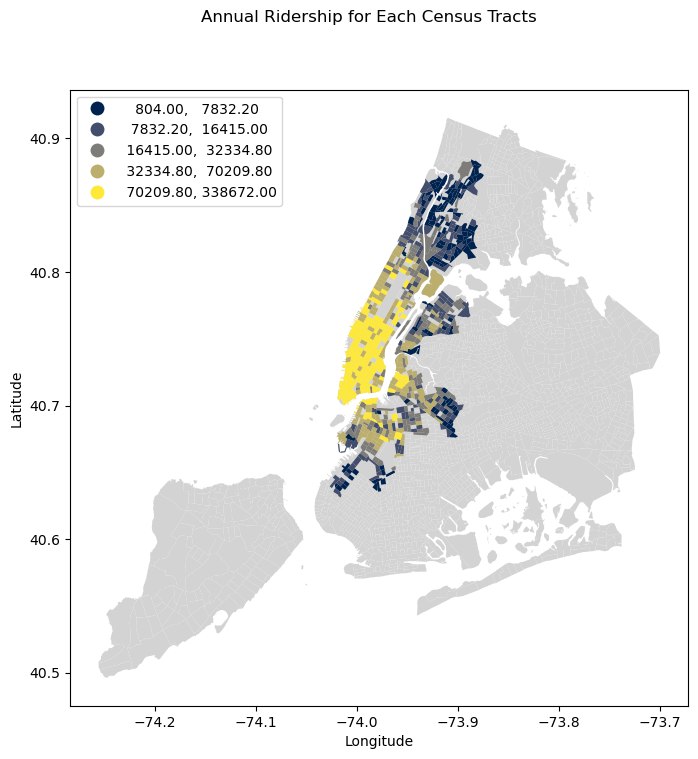

In [345]:
fig, ax = plt.subplots(figsize=(8,8))
city.plot(ax=ax, color='LightGrey')
plot.plot(ax = ax, column = 'Annual', scheme = 'Quantiles',cmap = 'cividis', legend = True, legend_kwds = {'loc': 'upper left'})
fig.suptitle('Annual Ridership for Each Census Tracts', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

/Users/Valencia/opt/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  warnings.warn(


Text(54.66309167843566, 0.5, 'Latitude')

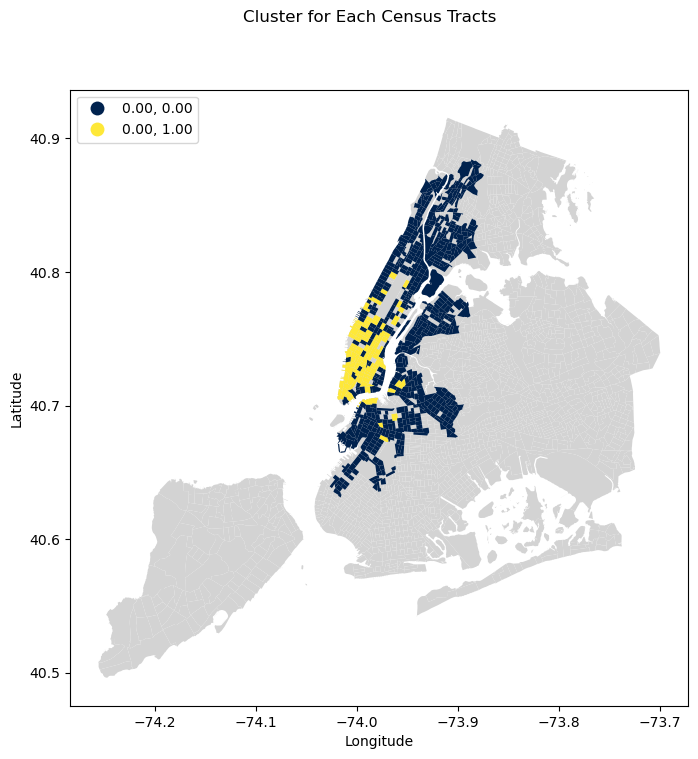

In [346]:
fig, ax = plt.subplots(figsize=(8,8))
city.plot(ax=ax, color='LightGrey')
plot.plot(ax = ax, column = 'Cluster', scheme = 'quantiles', cmap = 'cividis', legend = True, legend_kwds = {'loc': 'upper left'})
fig.suptitle('Cluster for Each Census Tracts', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

In [347]:
col=[]
for a in clustertotal.columns:
    if type(a) == str:
        pass
    else:
        a = str(a[0])+'_'+str(a[1])
    col.append(a)
clustertotal.columns=col

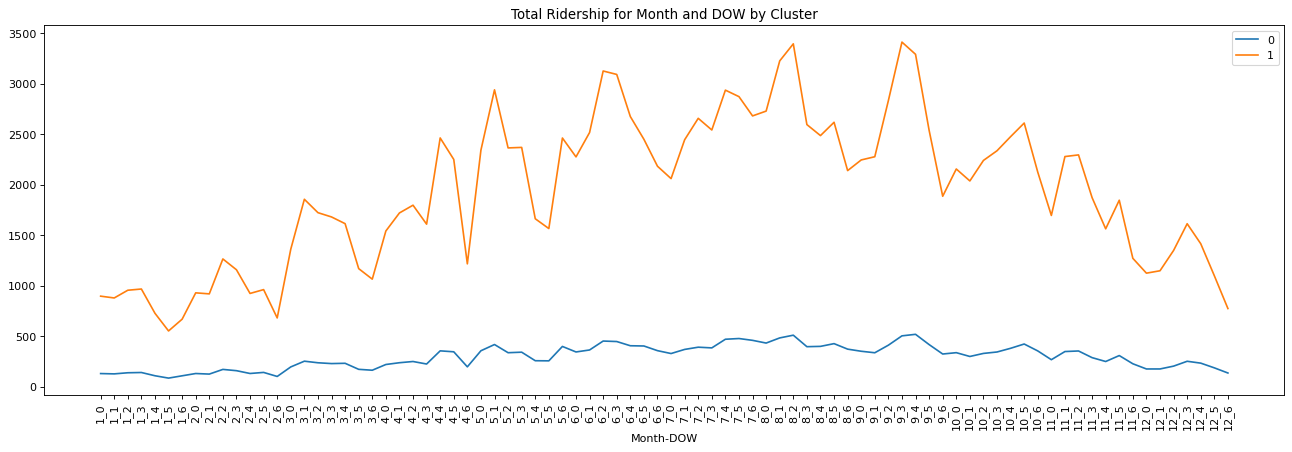

In [348]:
cluster_mean=clustertotal.iloc[:,15:-1].groupby(['Cluster']).mean()
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(cluster_mean.iloc[0, :], label='0')
plt.plot(cluster_mean.iloc[1, :], label='1')
plt.xticks(rotation=90)
plt.xlabel('Month-DOW')
plt.title('Total Ridership for Month and DOW by Cluster')
plt.legend()

### Month & DOW cluster

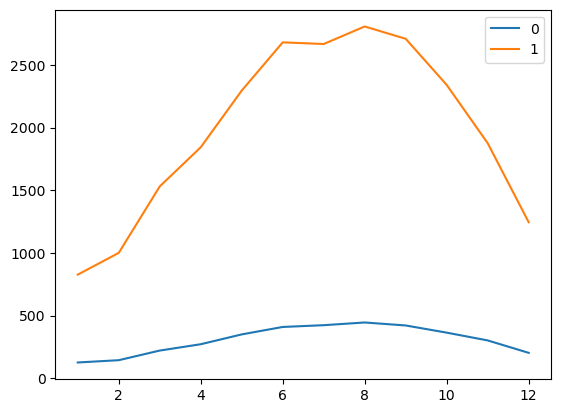

In [300]:
cluster_mean=clustermonth.iloc[:,15:].groupby(['Cluster']).mean()
plt.plot(cluster_mean.iloc[0, :], label='0')
plt.plot(cluster_mean.iloc[1, :], label='1')
plt.legend()

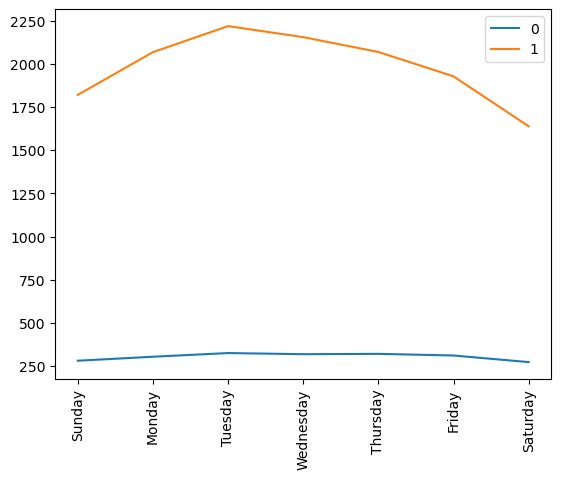

In [302]:
cluster_mean=clusterdow.iloc[:,15:].groupby(['Cluster']).mean()
plt.plot(cluster_mean.iloc[0, :], label='0')
plt.plot(cluster_mean.iloc[1, :], label='1')
plt.xticks(rotation=90)
plt.legend()

In [351]:
monthDOW=pd.pivot_table(df, values='Ridership',index=['DOWS'],columns=['MonthS'],aggfunc=np.mean)

In [352]:
monthDOW

MonthS,1,2,3,4,5,6,7,8,9,10,11,12
DOWS,,,,,,,,,,,,
0,240.785388,245.575342,361.705615,405.589394,634.043939,615.083333,561.903418,736.782032,598.064327,563.385940,438.641854,287.702364
1,235.635671,240.730887,479.921093,447.302432,771.175758,666.667678,649.579495,847.262150,590.491228,516.393113,578.556802,291.052851
2,255.614916,327.995434,447.889226,468.354103,621.554545,825.892424,696.513353,892.505155,729.330893,567.951220,583.339860,339.662031
3,259.940549,301.650456,435.858663,421.424658,626.640909,816.158850,674.568249,691.096154,878.544396,593.215517,477.699438,412.312935
4,197.831050,244.732523,427.408194,650.166667,454.707576,722.440909,798.801481,676.140118,872.194485,641.617816,406.707865,371.653686
5,153.596947,258.841705,313.374810,610.927273,439.478788,688.068182,795.045926,715.164948,692.172767,692.644189,491.686357,293.446453
6,189.242009,186.281346,291.333839,339.642424,686.080303,612.104545,754.259259,604.540501,526.541728,573.032999,351.950774,210.878999


Text(0, 0.5, 'Day of Week')

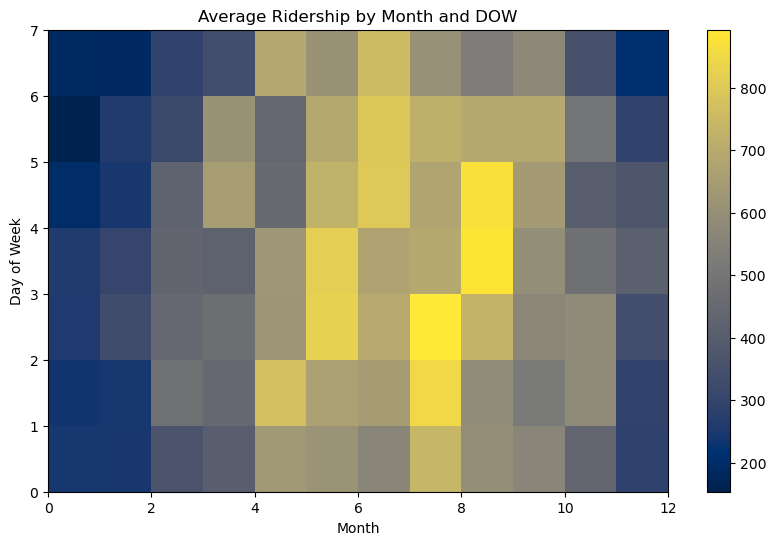

In [377]:
fig, ax = plt.subplots(figsize=(10,6))
cf=ax.pcolormesh(monthDOW, cmap='cividis')
fig.colorbar(cf, ax=ax)
ax.set_title('Average Ridership by Month and DOW')
ax.set_xlabel('Month')
ax.set_ylabel('Day of Week')